**GOAL**: *Build, Train, and Test a regression model to perform regression tasks and predict the charges in each person.*

In [ ]:
#1.1 Datasets เกี่ยวกับเรื่องอะไร
ประกันชีวิต

In [ ]:
#1.2 ต้องการสร้าง Model ในการทำนายอะไร
สร้าง Model ในการทำนายการจ่ายค่าสินไหมทดแทน

In [ ]:
#1.3 Input มีอะไรบ้าง (ชื่อ Column อะไรบ้าง)
age , sex , bmi , children , smoker , region

In [ ]:
#1.4 Output คืออะไร (ชื่อ Column อะไร)
 charges

In [50]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#ระบุที่อยู่ folder ของตัวเอง
%cd "/content/drive/MyDrive/Colab Notebooks/335 Machine Learning/Final/"

/content/drive/MyDrive/Colab Notebooks/335 Machine Learning/Final


In [71]:
# Read the CSV file
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [52]:
# Display the feature columns (มี Column ชื่ออะไรบ้าง)
insurance_df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [11]:
# Check the shape of the dataframe (เช็คขนาดข้อมูลว่ามีกี่แถว กี่คอลัมน์) ->.shape
insurance_df.shape

(1338, 7)

In [14]:
# Check data types of each column ->.dtypes
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**# Step2: ให้ Check missing value และถ้าในกรณีที่มี missing value ให้เติมค่า Null ด้วย ค่า Mean (ในกรณีที่ข้อมูลเป็นตัวเลข)**

In [ ]:
# Check if any missing values are present in the dataframe -> .isnull().sum()


In [72]:
insurance_df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [73]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**# Step2: ถ้าในกรณีที่ข้อมูลเป็นแบบ categorical ให้เติมค่า Missing value ด้วย [Pandas – Filling NaN in Categorical data](https://www.geeksforgeeks.org/pandas-filling-nan-in-categorical-data/)**

**# Step3: ในกรณีที่ตัวข้อมูลเป็นกลุ่มของข้อมูล (ข้อความ string, text) ให้เปลี่ยน column นั้น ให้เป็น one hot encoder**

In [74]:
insurance_df.astype({'sex': 'category','smoker': 'category','region': 'category'}).dtypes


age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [75]:
ohe = pd.get_dummies(data=insurance_df, columns=['sex','smoker','region'])

**# Step4: สร้างตัวแปรสำหรับเก็บ Input data และ Output data**

In [76]:
# สร้างตัวแปร X เพื่อเก็บ Input data
X = insurance_df.drop(columns = ['age','sex','bmi','children','smoker','region'])

In [77]:
#สร้างตัวแปร y สำหรับเก็บ Output data
y = insurance_df['charges']

In [78]:
#แปลงข้อมูลจาก Dataframe X และ y ให้เป็น Array X และ Array y
# reshaping the Array y ให้มองเป็นคอลัมน์ด้วย
X = np.array(X)
y = np.array(y)

y = y.reshape(-1,1)

**# Step5: เตรียมข้อมูลสำหรับ Training data และ Testing data**

In [79]:
# spliting the data into test 20% and train sets 80%
#Training Data เอาไว้สร้าง Model
#Testing Data เอาไว้ทดสอบประสิทธิภาพของ Model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

**# Step6: Training Model with XG-BOOST ALGORITHM (สร้าง Model ในการทำนาย)**

In [80]:
!pip install xgboost


In [81]:
# Train an XGBoost regressor model
import xgboost as xgb

model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 2, n_estimators = 100)

model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

**# Step7: Testing and Evaluating the Performance of Model (ทดสอบประสิทธิภาพของ Model)**

In [82]:
# make predictions on the test data
yXGB_predict = model_xgb.predict(X_test)

In [83]:
#Evaluate the performance of model

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, yXGB_predict)),'.3f'))
MSE = round(mean_squared_error(y_test, yXGB_predict),3)
MAE = round(mean_absolute_error(y_test, yXGB_predict),3)
r2 = round(r2_score(y_test, yXGB_predict),3)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)


RMSE = 207.001 
MSE = 42849.214 
MAE = 133.787 
R2 = 1.0


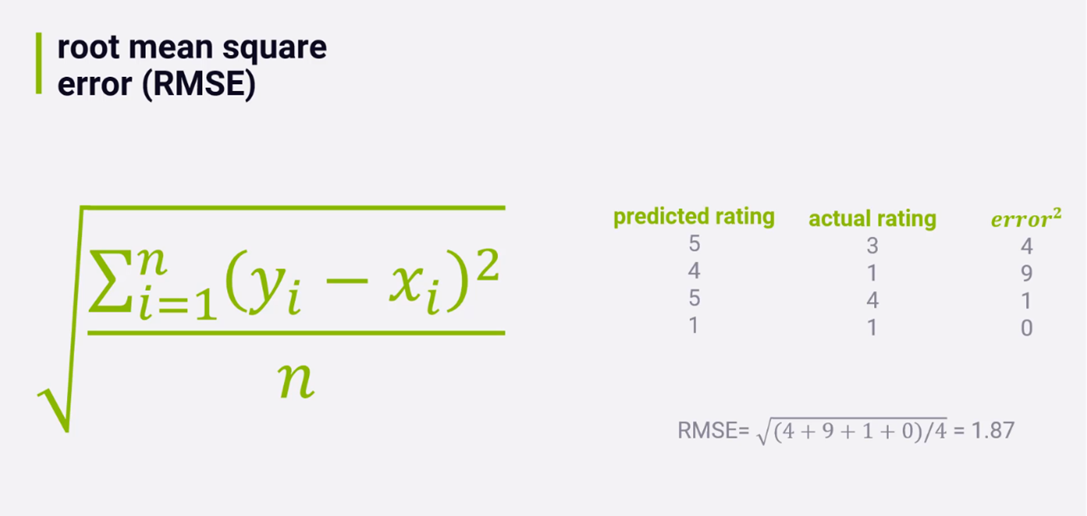

**# Step6.2: Training Model with Linear regression ALGORITHM (สร้าง Model ในการทำนาย)**

In [84]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)

**# Step7.2: Testing and Evaluating the Performance of Model (ทดสอบประสิทธิภาพของ Model)**

In [86]:
y_predict = model.predict(X_test)

In [87]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = round(mean_squared_error(y_test, y_predict),3)
MAE = round(mean_absolute_error(y_test, y_predict),3)
r2 = round(r2_score(y_test, y_predict),3)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 0.0 
MSE = 0.0 
MAE = 0.0 
R2 = 1.0


**# Step8: Deployment โดยทำการ Save AI Model ที่ได้ ที่ดีที่สุด เพื่อนำไปใช้ในการ deployement กับข้อมูลชุดใหม่ ที่ไม่ทราบค่า Output (ให้ Model Predict output)**

In [88]:
# loading library
import pickle

In [89]:
# create an iterator object with write permission - model.pickle and save model
with open('model_xgb', 'wb') as files:
    pickle.dump(model_xgb, files)

In [90]:
# load saved model
with open('model_xgb' , 'rb') as f:
    lr = pickle.load(f)


In [91]:
# นำข้อมูลชุดใหม่มาทำการ prediction
#จากตัวอย่างเลือกเอาข้อมูล 5 แถวแรกจากตัวแปร X มาใช้ในการ deployment
deploy_df = X[11:15,:]

deploy_df

array([[27808.7251],
       [ 1826.843 ],
       [11090.7178],
       [39611.7577]])

In [92]:
#แปลงข้อมูลชุดใหม่ที่อ่านมาได้ ให้อยู่ในรูปแบบ array ->np.array
array_data = insurance_df.to_numpy()
print(array_data)

[[19 'female' 27.9 ... 'yes' 'southwest' 16884.924]
 [18 'male' 33.77 ... 'no' 'southeast' 1725.5523]
 [28 'male' 33.0 ... 'no' 'southeast' 4449.462]
 ...
 [18 'female' 36.85 ... 'no' 'southeast' 1629.8335]
 [21 'female' 25.8 ... 'no' 'southwest' 2007.945]
 [61 'female' 29.07 ... 'yes' 'northwest' 29141.3603]]


In [93]:
#ใช้ model ที่ load มาทำการ predict ข้อมูลชุดใหม่
deploy_Y = lr.predict(deploy_df)
deploy_Y

array([27731.791 ,  1837.0309, 11362.233 , 39888.348 ], dtype=float32)

In [94]:
deploy_Y.shape

(4,)

In [95]:
deploy_arr=deploy_Y.reshape((-1, 1))

In [96]:
deploy_arr.shape

(4, 1)

In [ ]:
deploy_df.shape

**# สรุป Output ที่ได้จากการนำ model ไป deployment**

In [ ]:
pd.DataFrame(np.concatenate((deploy_arr, deploy_df), axis=1))

# วิธีการแทน Category Missing Value

In [ ]:
# import modules
import numpy as np
import pandas as pd

# create dataset
data = {'Id': [1, 2, 3, 4, 5, 6, 7, 8],

		'Gender': ['M', 'M', 'F', np.nan,
				np.nan, 'F', 'M', 'F'],

		'Color': [np.nan, "Red", "Blue",
				"Red", np.nan, "Red",
				"Green", np.nan]}

# convert to data frame
df = pd.DataFrame(data)
display(df)


,Id,Gender,Color
0,1,M,NaN
1,2,M,Red
2,3,F,Blue
3,4,NaN,Red
4,5,NaN,NaN
5,6,F,Red
6,7,M,Green
7,8,F,NaN


In [ ]:
# filling with most common class
df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean



,Id,Gender,Color
0,1,M,Red
1,2,M,Red
2,3,F,Blue
3,4,M,Red
4,5,M,Red
5,6,F,Red
6,7,M,Green
7,8,F,Red
